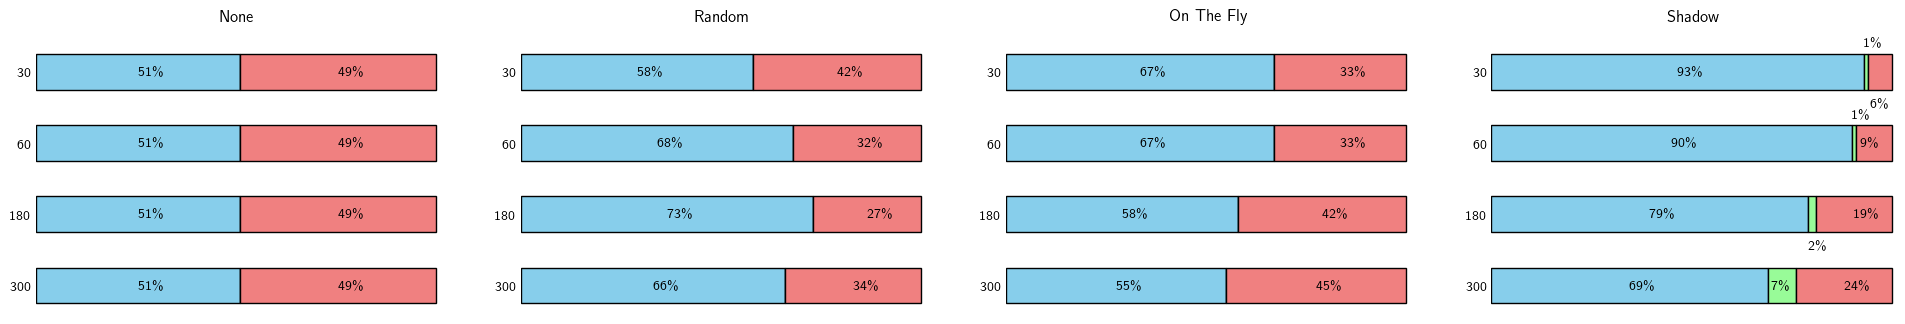

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

def addLost( f ):
 f[ 'Pristine' ] = f['Pristine'][::-1]
 f[ 'Restored' ] = f['Restored'][::-1]
 f[ 'Lost' ] = np.array(list(map(lambda a:100-a[0]-a[1],zip(f[ 'Pristine' ],f[ 'Restored' ]))))
 return f

times = ['30', '60', '180', '300']
files = {}
files[ 'none' ]= { 'title': 'None', 'data': addLost({
    'Pristine': np.array([51, 51, 51, 51]),
    'Restored': np.array([0, 0, 0, 0])
})}
files[ 'random' ] = { 'title': 'Random', 'data': addLost({
    'Pristine': np.array([58, 68, 73, 66]),
    'Restored': np.array([0, 0, 0, 0])
}) }
files[ 'on_the_fly' ] = { 'title': 'On The Fly', 'data': addLost({
    'Pristine': np.array([67, 67, 58, 55]),
    'Restored': np.array([0, 0, 0, 0])
}) }
files[ 'shadow' ] = { 'title': 'Shadow', 'data': addLost({
    'Pristine': np.array([93, 90, 79, 69]),
    'Restored': np.array([1, 1, 2, 7])
})}
height = 0.5 # the height of the bars, it makes them also closer 

fig, (files['none']['plt'], files['random']['plt'], files['on_the_fly']['plt'], files['shadow']['plt']) = \
    plt.subplots( 1, 4, figsize=(24,3.7) )

for strategy in files.keys():
 left = np.zeros(4)
 plot = files[ strategy ][ 'plt' ]
 colors=['skyblue','palegreen','lightcoral']
 bar_x = [0,0,0,0]
 for status, percentages in files[ strategy ][ 'data' ].items():
   p = plot.barh( times[::-1], percentages, height, label=status, left=left, color=colors.pop(0), edgecolor = "black", linewidth = 1 )
   left += percentages
   plot.set_xlim([0,101])
   plot.set_ylim([-0.4,3.6])
#    plot.bar_label( p, map(lambda x: f"{x}%" if x > 0 else "", percentages), label_type='center', color='white', fontsize=11, weight='bold' )
   ## write percentages over the bars
   counter=0
   prec_small=[False,False,False,False]
   for( bar, value ) in zip( p, percentages ):
    if( value > 0 ):
     x = bar_x[counter] + (lambda x: x/2 if x > 9 else x/9)( bar.get_width() )
     y = bar.get_y() + bar.get_height()/2
     color = 'black'
     if( value < 7 ):
        # color = 'black'
        if( prec_small[ counter-1 ] if counter > 0 else False ):
            y = bar.get_y() + bar.get_height() + 0.15
        else:
            y = bar.get_y() - 0.20
        prec_small[ counter ] = True ^ prec_small[ counter ]
     else:
        prec_small[ counter ] = False
     plot.text( x, y, f"{value}\%", va='center', ha='left', color=color, fontsize=10, weight='bold')
    bar_x[counter] += bar.get_width()
    counter+=1
 plot.set_title( files[ strategy ][ 'title' ] )
 plot.set_xticks([])
 plot.tick_params(axis='both', which='both', length=0)
 plot.spines['top'].set_visible(False)
 plot.spines['right'].set_visible(False)
 plot.spines['bottom'].set_visible(False)
 plot.spines['left'].set_visible(False)

# plt.legend()
plt.show()